In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 100
import japanize_matplotlib

import seaborn as sns
import pandas_profiling as pdp
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
import collections
import re

In [2]:
train=pd.read_csv('../input/train.csv')
test=pd.read_csv('../input/test.csv')
sample=pd.read_csv('../input/sample_submit.csv')

train_feat1=pd.read_feather('feature1/data/train_feat1.ftr')
test_feat1=pd.read_feather('feature1/data/test_feat1.ftr')

In [28]:
train[:3]

,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）,2年間


In [29]:
test[:3]

,id,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,31471,東京都世田谷区深沢５丁目1-27,東急大井町線\t等々力駅\t徒歩15分\t\t東急田園都市線\t桜新町駅\t徒歩24分\t\...,2LDK,49年0ヶ月,南,50.22m2,8階／8階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座／...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\tL字キッチン,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\tエレベーター\t公営水...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【コンビニ】 74m\t【スーパー】 215m\t【病院】 313m\t【小学校】 219m...,鉄骨造,NaN
1,31472,東京都目黒区八雲１丁目11-8,東急東横線\t都立大学駅\t徒歩6分\t\t東急東横線\t自由が丘駅\t徒歩17分\t\t東...,1R,0年2ヶ月,南東,20.88m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCSアンテナ／\tBSアンテナ／\tインターネット使用料無料,エアコン付\tシューズボックス／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水／...,"駐車場\t近隣\t34,000円(税込)\t距離200m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 128m\t【スーパー】 313m\t【コンビニ】 374m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間
2,31473,東京都豊島区池袋本町２丁目22-2,東武東上線\t北池袋駅\t徒歩10分\t\t埼京線\t板橋駅\t徒歩16分\t\t山手線\t...,1K,23年4ヶ月,南東,26.93m2,1階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー／\tCATV,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t2面採光／\t室内洗濯...,"駐車場\t空有\t5,000円(税込)\t(敷金あり\t1ヶ月)\t駐輪場\t空有\tバイク...",【スーパー】 529m\t【スーパー】 810m\t【コンビニ】 316m\t【コンビニ】 ...,鉄骨造,2年間


(0, 500000)

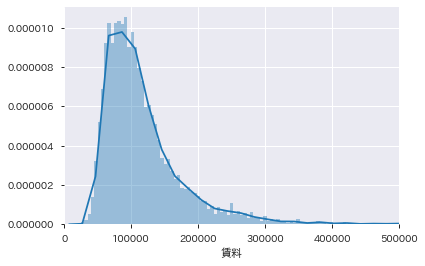

In [30]:
sns.distplot(train['賃料'],bins=500)
plt.xlim(0,500000)

In [31]:
print('train shape :',train.shape)
print('test shape :',test.shape)

train shape : (31470, 17)
test shape : (31262, 16)


In [37]:
train_index=len(train)
test_index=len(test)
df_all=pd.concat([train,test],axis=0,sort=False).reset_index(drop=True)

In [21]:
df_all.describe(include='O')

,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
count,62732,62732,62732,62732,57175,62732,62731,62083,61476,55838,62577,52089,44059,62732,48631
unique,17199,42991,38,771,8,6721,1402,404,447,150,9293,5927,32674,11,79
top,東京都世田谷区太子堂２丁目,都営大江戸線\t新江古田駅\t徒歩10分\t\t西武池袋線\t江古田駅\t徒歩20分\t\t...,1K,0年1ヶ月,南,20m2,2階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,駐車場\t無,【スーパー】 227m\t【スーパー】 442m\t【スーパー】 422m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間
freq,106,131,23661,1885,17697,486,5706,9113,11953,5166,3063,6392,89,34810,45052


In [39]:
df_all.columns=['id','rent','address','access','floor_info','old','direction','square','floor','bath','kitchen','broadcast','facility','parking','neighbors','structure','period']
df_all[:1]

,id,rent,address,access,floor_info,old,direction,square,floor,bath,kitchen,broadcast,facility,parking,neighbors,structure,period
0,1,75000.0,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間


所在地は全て都内。23区ある。

In [40]:
print(df_all['address'].apply(lambda x:'区' in(list(x))).sum())
print(df_all['address'].apply(lambda x:x.split('都')[0]).unique())

df_all['address']=df_all['address'].apply(lambda x:x.split('都')[1])
df_all['address']=df_all['address'].apply(lambda x:x.split('区')[0])

62732
['東京']


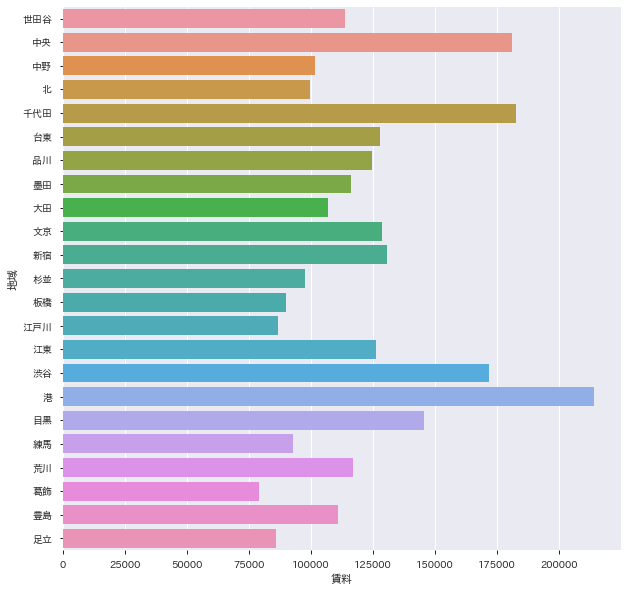

In [54]:
tmp=df_all.groupby('address')['rent'].mean().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(x='rent',y='address',data=tmp)
plt.xlabel('賃料')
plt.ylabel('地域')
plt.show()

アクセスは路線と駅名、何分の所かが記述されている.  
1,2,3駅分の情報が乗っている.家ごとに数が違うので注意.  
移動方法に関しては、徒歩、バス、車がある。バスの場合は、バス＋徒歩で記載されている。

In [283]:
train_line=[]
stations=[]
distances=[]
for i in tqdm(range(len(df_all))):
    access_info=df_all['access'][i].split('\t')
    if len(access_info)==11:
            train_line.append(access_info[8])
            stations.append(access_info[9])
            distances.append(access_info[10])
    if len(access_info)>=7:
            train_line.append(access_info[4])
            stations.append(access_info[5])
            distances.append(access_info[6])
    train_line.append(access_info[0])
    stations.append(access_info[1])
    distances.append(access_info[2])

100%|██████████| 62732/62732 [00:00<00:00, 72649.28it/s]


In [287]:
print('unique train_line:',len(set(train_line)))
print('unique stations:',len(set(stations)))
print('unique distances:',len(set(distances)))

unique train_line: 73
unique stations: 535
unique distances: 1940


間取り.部屋の大きさは家賃に影響を及ぼしているのがわかるので、重要な特徴になりそう。

In [291]:
df_all['floor_info'].unique()

array(['1K', '1R', '2LDK', '2DK', '1DK', '1LDK', '3LDK', '3DK',
       '1LDK+S(納戸)', '4K', '2K', '1K+S(納戸)', '4LDK', '3LDK+S(納戸)',
       '5LDK+S(納戸)', '5LDK', '3K', '4DK', '2LDK+S(納戸)', '2DK+S(納戸)',
       '4LDK+S(納戸)', '5DK', '3DK+S(納戸)', '1DK+S(納戸)', '5K', '6LDK',
       '2K+S(納戸)', '1LK+S(納戸)', '5DK+S(納戸)', '3K+S(納戸)', '8LDK',
       '6LDK+S(納戸)', '11R', '6K', '6DK', '4DK+S(納戸)', '2R', '1LK'],
      dtype=object)

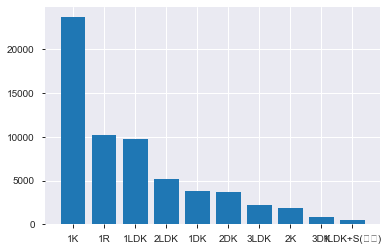

In [309]:
count=df_all['floor_info'].value_counts()[:10]
plt.bar(count.index,count)
plt.show()

In [314]:
rent=pd.qcut(df_all['rent'],20)
pd.crosstab(df_all['floor_info'],rent)

rent,"(24999.999, 54000.0]","(54000.0, 60000.0]","(60000.0, 66000.0]","(66000.0, 71000.0]","(71000.0, 76000.0]","(76000.0, 81000.0]","(81000.0, 86000.0]","(86000.0, 91000.0]","(91000.0, 96000.0]","(96000.0, 102000.0]","(102000.0, 107000.0]","(107000.0, 113000.0]","(113000.0, 120000.0]","(120000.0, 127500.0]","(127500.0, 136000.0]","(136000.0, 149500.0]","(149500.0, 167000.0]","(167000.0, 191000.0]","(191000.0, 240000.0]","(240000.0, 2500000.0]"
floor_info,,,,,,,,,,,,,,,,,,,,
1DK,39,81,78,100,121,119,104,88,87,90,96,131,134,111,133,145,149,64,21,2
1DK+S(納戸),0,0,0,0,1,2,0,1,2,1,1,2,1,0,1,1,0,0,1,0
1K,752,640,868,702,839,823,967,919,898,967,738,697,686,443,444,337,117,46,39,8
1K+S(納戸),1,0,1,1,8,3,5,6,0,4,10,14,10,0,2,3,5,0,2,0
1LDK,2,4,14,26,44,53,71,113,95,166,207,186,256,268,389,487,660,768,671,343
1LDK+S(納戸),0,0,0,0,0,0,2,0,1,2,1,8,8,11,14,7,14,46,63,61
1LK+S(納戸),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
1R,801,655,616,400,331,283,224,235,167,186,159,167,164,117,173,152,126,74,44,8
2DK,3,25,86,124,132,183,158,134,147,126,107,134,140,103,98,63,66,37,36,7


築年数  
ー年ー月の表記で書かれている。新築もあるので、0 ヶ月と分けて扱う方が良さそう。  
外れ値があるが、他の特徴が効いているとも考えられそう

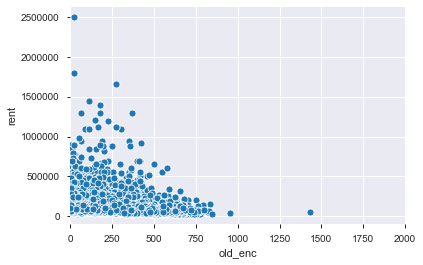

In [358]:
df_all['old_enc']=df_all['old'].apply(lambda x:int(x.split('年')[0])*12+int(x.split('年')[1].split('ヶ月')[0])+1 if x!='新築' else 0)
sns.scatterplot(x='old_enc',y='rent',data=df_all)
plt.xlim(0,2000)
plt.show()

 方角  
 欠損があるので、扱いに気をつける

In [367]:
display(pd.DataFrame(df_all['direction'].value_counts()))
pd.crosstab(df_all['direction'],pd.qcut(df_all['rent'],15))

,direction
南,17697
東,9943
西,8087
南東,6150
南西,6122
北,3767
北西,2742
北東,2667


rent,"(24999.999, 56000.0]","(56000.0, 65000.0]","(65000.0, 71000.0]","(71000.0, 78000.0]","(78000.0, 85000.0]","(85000.0, 91000.0]","(91000.0, 98000.0]","(98000.0, 105000.0]","(105000.0, 113000.0]","(113000.0, 122000.0]","(122000.0, 133000.0]","(133000.0, 149500.0]","(149500.0, 174000.0]","(174000.0, 220000.0]","(220000.0, 2500000.0]"
direction,,,,,,,,,,,,,,,
北,100,124,65,100,120,123,141,141,148,198,102,163,97,189,155
北東,51,68,50,63,83,88,122,97,100,107,95,108,83,100,106
北西,52,68,55,44,69,67,88,107,88,103,110,91,95,179,110
南,681,843,572,691,719,544,498,471,525,546,625,579,531,573,511
南東,188,218,158,226,173,154,188,166,176,163,208,221,258,286,315
南西,173,197,142,182,226,174,190,205,170,216,193,242,296,226,248
東,389,409,267,339,361,308,350,439,327,299,295,337,345,270,260
西,250,330,186,260,306,228,269,355,343,226,268,243,290,235,237


面積  
平方メートルで表記。これは普通に扱えそう。間取りと関係がありそう。

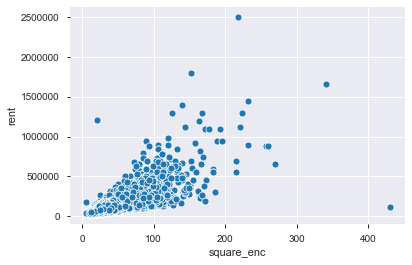

In [389]:
df_all['square_enc']=df_all['square'].apply(lambda x:float(x.split('m')[0]))
sns.scatterplot(x='square_enc',y='rent',data=df_all)
plt.show()

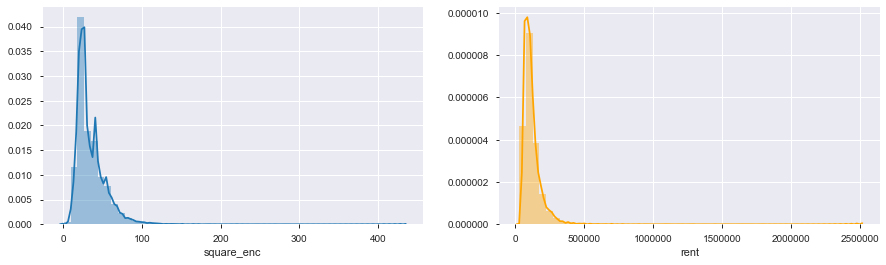

In [398]:
fig,ax=plt.subplots(1,2,figsize=(15,4))
sns.distplot(df_all['square_enc'],ax=ax[0])
sns.distplot(df_all[:train_index]['rent'],ax=ax[1],color='orange')
plt.show()

所在階  
何階立てで、何階にあたるかを記載。  
○階/○階建(地下○階)　という表記。たまに、何階の建物なのかや、どの階なのか欠損している箇所がある。  
/○階建　や　○階建　というように、/があるものとないものがあるので、うまく処理する必要がある

In [403]:
set(df_all['floor'])

{nan,
 '16階／31階建（地下1階）',
 '31階／33階建',
 '6階／14階建（地下1階）',
 '7階／14階建',
 '地下1階／10階建',
 '14階／30階建（地下1階）',
 '19階／22階建',
 '13階／58階建（地下2階）',
 '3階／48階建',
 '42階／49階建',
 '4階／10階建',
 '42階／48階建（地下1階）',
 '4階／12階建',
 '5階／15階建（地下1階）',
 '15階／28階建',
 '8階／58階建（地下2階）',
 '50階／53階建（地下2階）',
 '29階／54階建（地下3階）',
 '3階／28階建（地下2階）',
 '6階／43階建（地下3階）',
 '2階／14階建（地下1階）',
 '4階／30階建（地下1階）',
 '21階／39階建',
 '5階／16階建',
 '5階／20階建',
 '10階／27階建',
 '4階／49階建（地下2階）',
 '地下1階／11階建',
 '38階／56階建（地下2階）',
 '4階／18階建（地下1階）',
 '10階／22階建（地下1階）',
 '42階／50階建',
 '20階／27階建（地下1階）',
 '11階／23階建',
 '39階／48階建（地下1階）',
 '11階／49階建（地下1階）',
 '6階／13階建（地下1階）',
 '11階／11階建（地下1階）',
 '3階／28階建（地下1階）',
 '42階／53階建（地下2階）',
 '23階／30階建（地下3階）',
 '13階／19階建（地下1階）',
 '16階／19階建',
 '6階／9階建（地下2階）',
 '40階／55階建（地下2階）',
 '30階／58階建（地下2階）',
 '22階／37階建',
 '19階／25階建',
 '12階／29階建（地下1階）',
 '51階／53階建（地下2階）',
 '13階／15階建',
 '42階／42階建（地下3階）',
 '1階／4階建',
 '／12階建',
 '13階／15階建（地下1階）',
 '38階／49階建',
 '7階／20階建',
 '4階／22階建',
 '15階／49階建（地下1階）',
 '8階／10階建（地下1階）',
 '24階／35階建',
 '12階／15階建（地下1階）

バス・トイレ  
欠損があるので処理が必要。種類自体は少ないので、ワンホットエンコードがよい

In [501]:
df_all['bath']=df_all['bath'].fillna(0)
df_all['bath_list']=df_all['bath'].apply(lambda x:x.split('／') if x !=0 else 'nan')

def drop_t(x):
    if x!='nan':
        return list(map(lambda y:y.strip('\t'),x))
    else:
        return 0
    
df_all['bath_list']=df_all['bath_list'].apply(lambda x:drop_t(x))

In [510]:
bath_all=[]
for i in tqdm(range(len(df_all))):
    if df_all['bath_list'][i]==0:
        continue
    else:
        bath_all.extend(df_all['bath_list'][i])

100%|██████████| 62732/62732 [00:02<00:00, 29268.17it/s]


In [511]:
set(bath_all)

{'シャワー',
 'トイレなし',
 'バスなし',
 'バス・トイレ別',
 '共同トイレ',
 '共同バス',
 '専用トイレ',
 '専用バス',
 '洗面台独立',
 '浴室乾燥機',
 '温水洗浄便座',
 '脱衣所',
 '追焚機能'}

キッチン  
バスと同じ感じ。ワンホットエンコかな

In [521]:
df_all['kitchen']=df_all['kitchen'].fillna(0)
df_all['kitchen_list']=df_all['kitchen'].apply(lambda x:x.split('／') if x !=0 else 'nan')

def drop_t(x):
    if x!='nan':
        return list(map(lambda y:y.strip('\t'),x))
    else:
        return 0
    
df_all['kitchen_list']=df_all['kitchen'].apply(lambda x:drop_t(x))

In [524]:
kitchen_all=[]
for i in tqdm(range(len(df_all))):
    if df_all['kitchen_list'][i]==0:
        continue
    else:
        kitchen_all.extend(df_all['kitchen_list'][i])

100%|██████████| 62732/62732 [00:02<00:00, 30435.52it/s]


In [526]:
set(kitchen_all)

{'IHコンロ',
 'L字キッチン',
 'カウンターキッチン',
 'ガスコンロ',
 'コンロ1口',
 'コンロ2口',
 'コンロ3口',
 'コンロ4口以上',
 'コンロ設置可（コンロ1口）',
 'コンロ設置可（コンロ2口）',
 'コンロ設置可（コンロ3口）',
 'コンロ設置可（コンロ4口以上）',
 'コンロ設置可（口数不明）',
 'システムキッチン',
 '冷蔵庫あり',
 '独立キッチン',
 '給湯',
 '電気コンロ'}

In [528]:
df_all['broadcast']=df_all['broadcast'].fillna(0)
df_all['broadcast_list']=df_all['broadcast'].apply(lambda x:x.split('／') if x !=0 else 'nan')

def drop_t(x):
    if x!='nan':
        return list(map(lambda y:y.strip('\t'),x))
    else:
        return 0
    
df_all['broadcast_list']=df_all['broadcast_list'].apply(lambda x:drop_t(x))

In [530]:
broadcast_all=[]
for i in tqdm(range(len(df_all))):
    if df_all['broadcast_list'][i]==0:
        continue
    else:
        broadcast_all.extend(df_all['broadcast_list'][i])

100%|██████████| 62732/62732 [00:01<00:00, 31938.65it/s]


In [534]:
set(broadcast_all)

{'BSアンテナ',
 'CATV',
 'CSアンテナ',
 'インターネット使用料無料',
 'インターネット対応',
 '光ファイバー',
 '有線放送',
 '高速インターネット'}

In [539]:
collections.Counter(broadcast_all)

Counter({'インターネット対応': 34190,
         'CATV': 26054,
         'CSアンテナ': 18502,
         'BSアンテナ': 26859,
         '光ファイバー': 32596,
         '高速インターネット': 4967,
         'インターネット使用料無料': 10662,
         '有線放送': 156})

室内設備  
バスなどと表記が違うので注意。これもワンホット

In [607]:
df_all['facility']=df_all['facility'].fillna(0)
df_all['facility_list']=df_all['facility'].apply(lambda x:x.split('\t') if x !=0 else 'nan')

def clean_list(words):
    if words=='nan':
        return 'nan'
    else:
        return [w for w in words if w !='／']

df_all['facility_list']=df_all['facility_list'].apply(lambda x:clean_list(x))

def drop_t(x):
    if x!='nan':
        return list(map(lambda y:y.strip('／'),x))
    else:
        return 0
    
df_all['facility_list']=df_all['facility_list'].apply(lambda x:drop_t(x))

In [608]:
facility_all=[]
for i in tqdm(range(len(df_all))):
    if df_all['facility_list'][i]==0:
        continue
    else:
        facility_all.extend(df_all['facility_list'][i])

100%|██████████| 62732/62732 [00:02<00:00, 30574.19it/s]


In [614]:
collections.Counter(facility_all)

Counter({'エアコン付': 59257,
         'シューズボックス': 45798,
         'バルコニー': 49969,
         'フローリング': 54353,
         '室内洗濯機置場': 54579,
         '敷地内ごみ置き場': 33275,
         'エレベーター': 32146,
         '公営水道': 46183,
         '下水': 46701,
         '都市ガス': 50802,
         'タイル張り': 27130,
         'ウォークインクローゼット': 7547,
         '2面採光': 13132,
         '24時間換気システム': 21390,
         '3面採光': 2160,
         'ペアガラス': 1252,
         '専用庭': 438,
         '水道その他': 3410,
         '冷房': 10474,
         'クッションフロア': 773,
         '床暖房': 3209,
         'プロパンガス': 1971,
         'ロフト付き': 2458,
         '出窓': 2536,
         'トランクルーム': 1028,
         '汲み取り': 11,
         'オール電化': 1128,
         'ルーフバルコニー': 658,
         '室外洗濯機置場': 3445,
         '床下収納': 1198,
         'バリアフリー': 322,
         '浄化槽': 18,
         '防音室': 120,
         '二重サッシ': 178,
         '二世帯住宅': 4,
         'ガスその他': 35,
         '洗濯機置場なし': 132,
         '排水その他': 14,
         '石油暖房': 2,
         '地下室': 10,
         'ガス暖房': 13,
         '井戸': 3})

駐車場  
規則的にまとめられていないので扱いが難しそう。駐車料金があるものとないものがある.  
駐車料金のみを取り出して考えるのがまずは簡単そう

In [621]:
df_all['parking']=df_all['parking'].fillna(0)
df_all['parking_list']=df_all['parking'].apply(lambda x:x.split('\t') if x !=0 else 'nan')


'駐車場\t無\t駐輪場\t無\tバイク置き場\t無'

In [625]:
df_all['parking'][10:50]

10            駐車場\t空有\t32,400円(税込)\t駐輪場\t空有\tバイク置き場\t空有
11                                                  NaN
12                                                  NaN
13                                    駐輪場\t無\tバイク置き場\t無
14                                   駐輪場\t空有\tバイク置き場\t無
15      駐車場\t近隣\t27,000円(税込)\t距離500m\t駐輪場\t無\tバイク置き場\t無
16        駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t23,000円\t距離150m
17                             駐車場\t近隣\t15,120円\t距離200m
18                                              駐輪場\t空有
19                            駐車場\t無\t駐輪場\t無\tバイク置き場\t無
20             駐車場\t空有\t0円\t駐輪場\t空有\t0円\tバイク置き場\t空有\t0円
21                                              駐輪場\t空有
22                                              駐輪場\t空有
23     駐輪場\t空有\t駐車場\t近隣\t25,000円(税込)\t距離100m\tバイク置き場\t無
24                  駐車場\t空有(1台)\t10,000円\t距離0m\t(小型車のみ)
25                                          駐輪場\t空有\t0円
26     駐輪場\t空有\t駐車場\t近隣\t37,800円(税込)\t距離300m\tバイク置き場\t無
27                                   駐輪場\t空有\tバイ

近隣情報  
近くにある建物の種類と、その距離が記載されている。  
コンビニなど、複数あるものは最短のものの距離が別ればいい気がする。  
コンビニがいくつあるかまとめてもよい

In [688]:
df_all['neighbors']=df_all['neighbors'].fillna('nan')

def get_building(src):
    m = re.findall(r'\【.+?\】', src)
    return m

df_all['neighbors_list']=df_all['neighbors'].apply(lambda x:get_building(x))

In [692]:
neighbors_all=[]
for i in tqdm(range(len(df_all))):
    if len(df_all['neighbors_list'])==0:
        continue
    else:
        neighbors_all.extend(df_all['neighbors_list'][i])

100%|██████████| 62732/62732 [00:01<00:00, 47395.88it/s]


In [694]:
set(neighbors_all)

{'【クリーニング】',
 '【コインパーキング】',
 '【コンビニ】',
 '【スーパー】',
 '【デパート】',
 '【ドラッグストア】',
 '【レンタルビデオ】',
 '【公園】',
 '【図書館】',
 '【大学】',
 '【学校】',
 '【小学校】',
 '【幼稚園・保育園】',
 '【月極駐車場】',
 '【病院】',
 '【総合病院】',
 '【郵便局】',
 '【銀行】',
 '【飲食店】'}

構造  
何も気にせずエンコードすればいい

In [698]:
df_all['structure'].value_counts()

RC（鉄筋コンクリート）                   34810
木造                             11062
鉄骨造                             7495
SRC（鉄骨鉄筋コンクリート）                 4792
軽量鉄骨                            3608
ALC（軽量気泡コンクリート）                  577
その他                              268
PC（プレキャスト・コンクリート（鉄筋コンクリート））      102
HPC（プレキャスト・コンクリート（重量鉄骨））          10
ブロック                               5
鉄筋ブロック                             3
Name: structure, dtype: int64

契約期間  
○年間という表記と、○年間、この物件は定期借家です、○年○月まで  
という3つの表記がある。ほとんどが2年間なので、欠損の埋め方は最頻値でいいきがする

2019年8月が起点となる

In [715]:
counts=0
index=[]
df_all['period']=df_all['period'].fillna('2年間')
for i in range(len(df_all)):
    if 'まで' in df_all['period'][i]:
        counts+=1
        index.append(i)

In [730]:
df_all['period'][index]

275       2021年4月まで\t※この物件は\t定期借家\tです。
297       2023年3月まで\t※この物件は\t定期借家\tです。
360       2022年3月まで\t※この物件は\t定期借家\tです。
730       2021年8月まで\t※この物件は\t定期借家\tです。
1322      2020年3月まで\t※この物件は\t定期借家\tです。
                     ...              
62057     2020年8月まで\t※この物件は\t定期借家\tです。
62297     2020年3月まで\t※この物件は\t定期借家\tです。
62427     2023年7月まで\t※この物件は\t定期借家\tです。
62577    2019年11月まで\t※この物件は\t定期借家\tです。
62581    2021年12月まで\t※この物件は\t定期借家\tです。
Name: period, Length: 186, dtype: object

In [732]:
df_all['period'].unique()

array(['2年間', '2年間\t※この物件は\t定期借家\tです。', '1年間', '5年間\t※この物件は\t定期借家\tです。',
       '1年間\t※この物件は\t定期借家\tです。', '3年間\t※この物件は\t定期借家\tです。', '2ヶ月間',
       '4年間\t※この物件は\t定期借家\tです。', '2021年4月まで\t※この物件は\t定期借家\tです。',
       '2023年3月まで\t※この物件は\t定期借家\tです。', '2022年3月まで\t※この物件は\t定期借家\tです。',
       '2021年8月まで\t※この物件は\t定期借家\tです。', '1ヶ月間', '3年間',
       '2020年3月まで\t※この物件は\t定期借家\tです。', '5年間',
       '2021年2月まで\t※この物件は\t定期借家\tです。', '22年間', '12年間',
       '2020年6月まで\t※この物件は\t定期借家\tです。', '4年間', '4年8ヶ月間\t※この物件は\t定期借家\tです。',
       '2021年7月まで\t※この物件は\t定期借家\tです。', '2022年6月まで\t※この物件は\t定期借家\tです。',
       '2021年3月まで\t※この物件は\t定期借家\tです。', '2021年12月まで\t※この物件は\t定期借家\tです。',
       '3年3ヶ月間\t※この物件は\t定期借家\tです。', '2022年7月まで\t※この物件は\t定期借家\tです。',
       '2年6ヶ月間\t※この物件は\t定期借家\tです。', '2022年2月まで\t※この物件は\t定期借家\tです。',
       '1年10ヶ月間\t※この物件は\t定期借家\tです。', '2023年8月まで\t※この物件は\t定期借家\tです。',
       '2020年5月まで\t※この物件は\t定期借家\tです。', '7年間\t※この物件は\t定期借家\tです。',
       '10年間\t※この物件は\t定期借家\tです。', '2021年1月まで\t※この物件は\t定期借家\tです。',
       '2019年12

## 同じ物件があるか確認

In [8]:
train_df=train.drop(['id','賃料'],axis=1)
test_df=test.drop(['id'],axis=1) 

In [44]:
df=pd.concat([train_df,test_df]).groupby('所在地').size().reset_index()
df.columns=['address','count']
df.sort_values(by='count',ascending=False)

,address,count
747,東京都世田谷区太子堂２丁目,106
9405,東京都板橋区板橋３丁目1-8,102
2907,東京都中野区白鷺２丁目1-21,92
15573,東京都豊島区南長崎５丁目,85
2160,東京都中央区日本橋馬喰町２丁目4-12,81
...,...,...
7298,東京都新宿区大久保２丁目14-15,1
7299,東京都新宿区大久保２丁目15-16,1
7301,東京都新宿区大久保２丁目17-12,1
7304,東京都新宿区大久保２丁目25-29,1


Text(0.5, 0, '賃料\u3000対数')

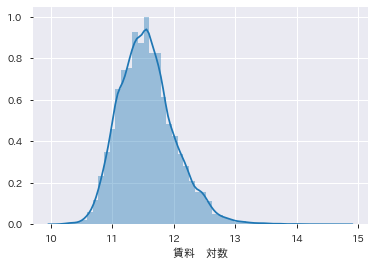

In [58]:
train=pd.read_feather('feature2/data/train_feat2.ftr')
sns.distplot(np.log(train['rent']))
plt.xlabel('賃料　対数')

In [59]:
sns.scatterplot(x='')

0        139.731307
1        139.778811
2        139.666064
3        139.650554
4        139.878559
            ...    
31462    139.676417
31463    139.665579
31464    139.831661
31465    139.671012
31466    139.692378
Name: latitude, Length: 31467, dtype: float64

In [78]:
tmp=train[train['rent']<train['rent'].mean()+2*train['rent'].std()]

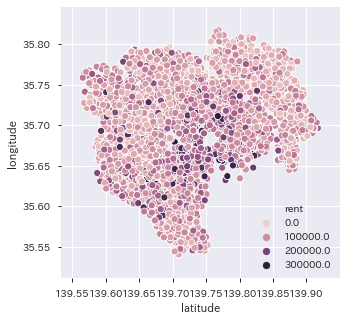

In [79]:
plt.figure(figsize=(5,5))
sns.scatterplot(y='longitude',x='latitude',hue='rent',data=tmp)

#plt.xlim(train['longitude'].max(),train['longitude'].min())

## 住宅価格の広がり

No handles with labels found to put in legend.


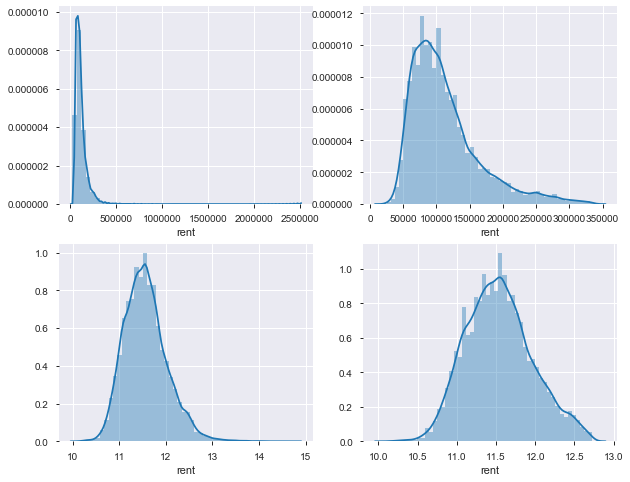

In [5]:
fig,ax=plt.subplots(2,2,figsize=(10,8))

sns.distplot(train_feat1['rent'],ax=ax[0,0],label='normal')

out_value=train_feat1['rent'].mean()+3*train_feat1['rent'].std()
sns.distplot(train_feat1[train_feat1['rent']<out_value]['rent'],ax=ax[0,1],label='escape_out_value')


sns.distplot(np.log(train_feat1['rent']),ax=ax[1,0])
sns.distplot(np.log(train_feat1[train_feat1['rent']<out_value]['rent']),ax=ax[1,1])
plt.legend()
plt.show()